# Property Price Prediction Project

## Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

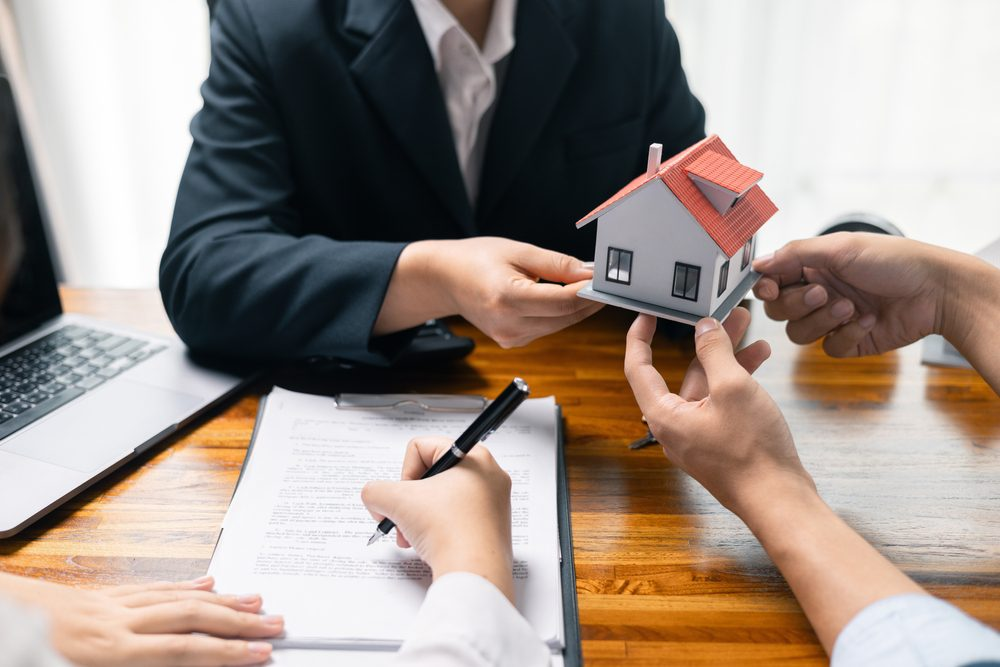

In [1]:
import IPython
IPython.display.Image('https://assets-news.housing.com/news/wp-content/uploads/2024/10/23191229/shutterstock_2457972607.jpg',width=500)

## Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing


warnings.filterwarnings('ignore')
print('Modules Loaded Successfully')

Modules Loaded Successfully


## Step 2: Load Data Create DF

In [3]:
# Internet Required For This Code to Run
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(data_dict['target_names'])

['MedHouseVal']


In [6]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']

print('Data Loaded Successfully!')

Data Loaded Successfully!


## Step 3: Understanding Data using EDA

In [7]:
# Shape
df.shape

(20640, 9)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# Checking null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# hundreds of thousands of dollars ($100,000) 1lakh Dollars
# average number of household members
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6546,3.5129,36.0,4.352751,1.071197,1511.0,4.889968,34.05,-118.03,1.423
11319,3.6333,7.0,4.094545,1.036364,1576.0,2.865455,33.77,-117.98,1.698
1772,2.7714,38.0,4.201613,1.165323,773.0,3.116935,37.95,-122.36,1.047
9503,3.4063,28.0,5.488372,1.139535,812.0,3.147287,38.99,-123.39,1.094
2971,8.5325,14.0,7.973585,0.966038,842.0,3.177358,35.35,-119.09,2.241
14089,3.3854,31.0,4.116697,0.985637,1108.0,1.989228,32.76,-117.11,2.044
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.710
7156,3.6875,44.0,4.524476,0.993007,457.0,3.195804,34.04,-118.15,1.625
2805,3.0268,5.0,4.869863,1.111872,1182.0,2.698630,35.44,-119.05,0.770
14508,3.9356,4.0,4.622318,1.174893,1923.0,2.063305,32.86,-117.20,2.670


In [12]:
# All data must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

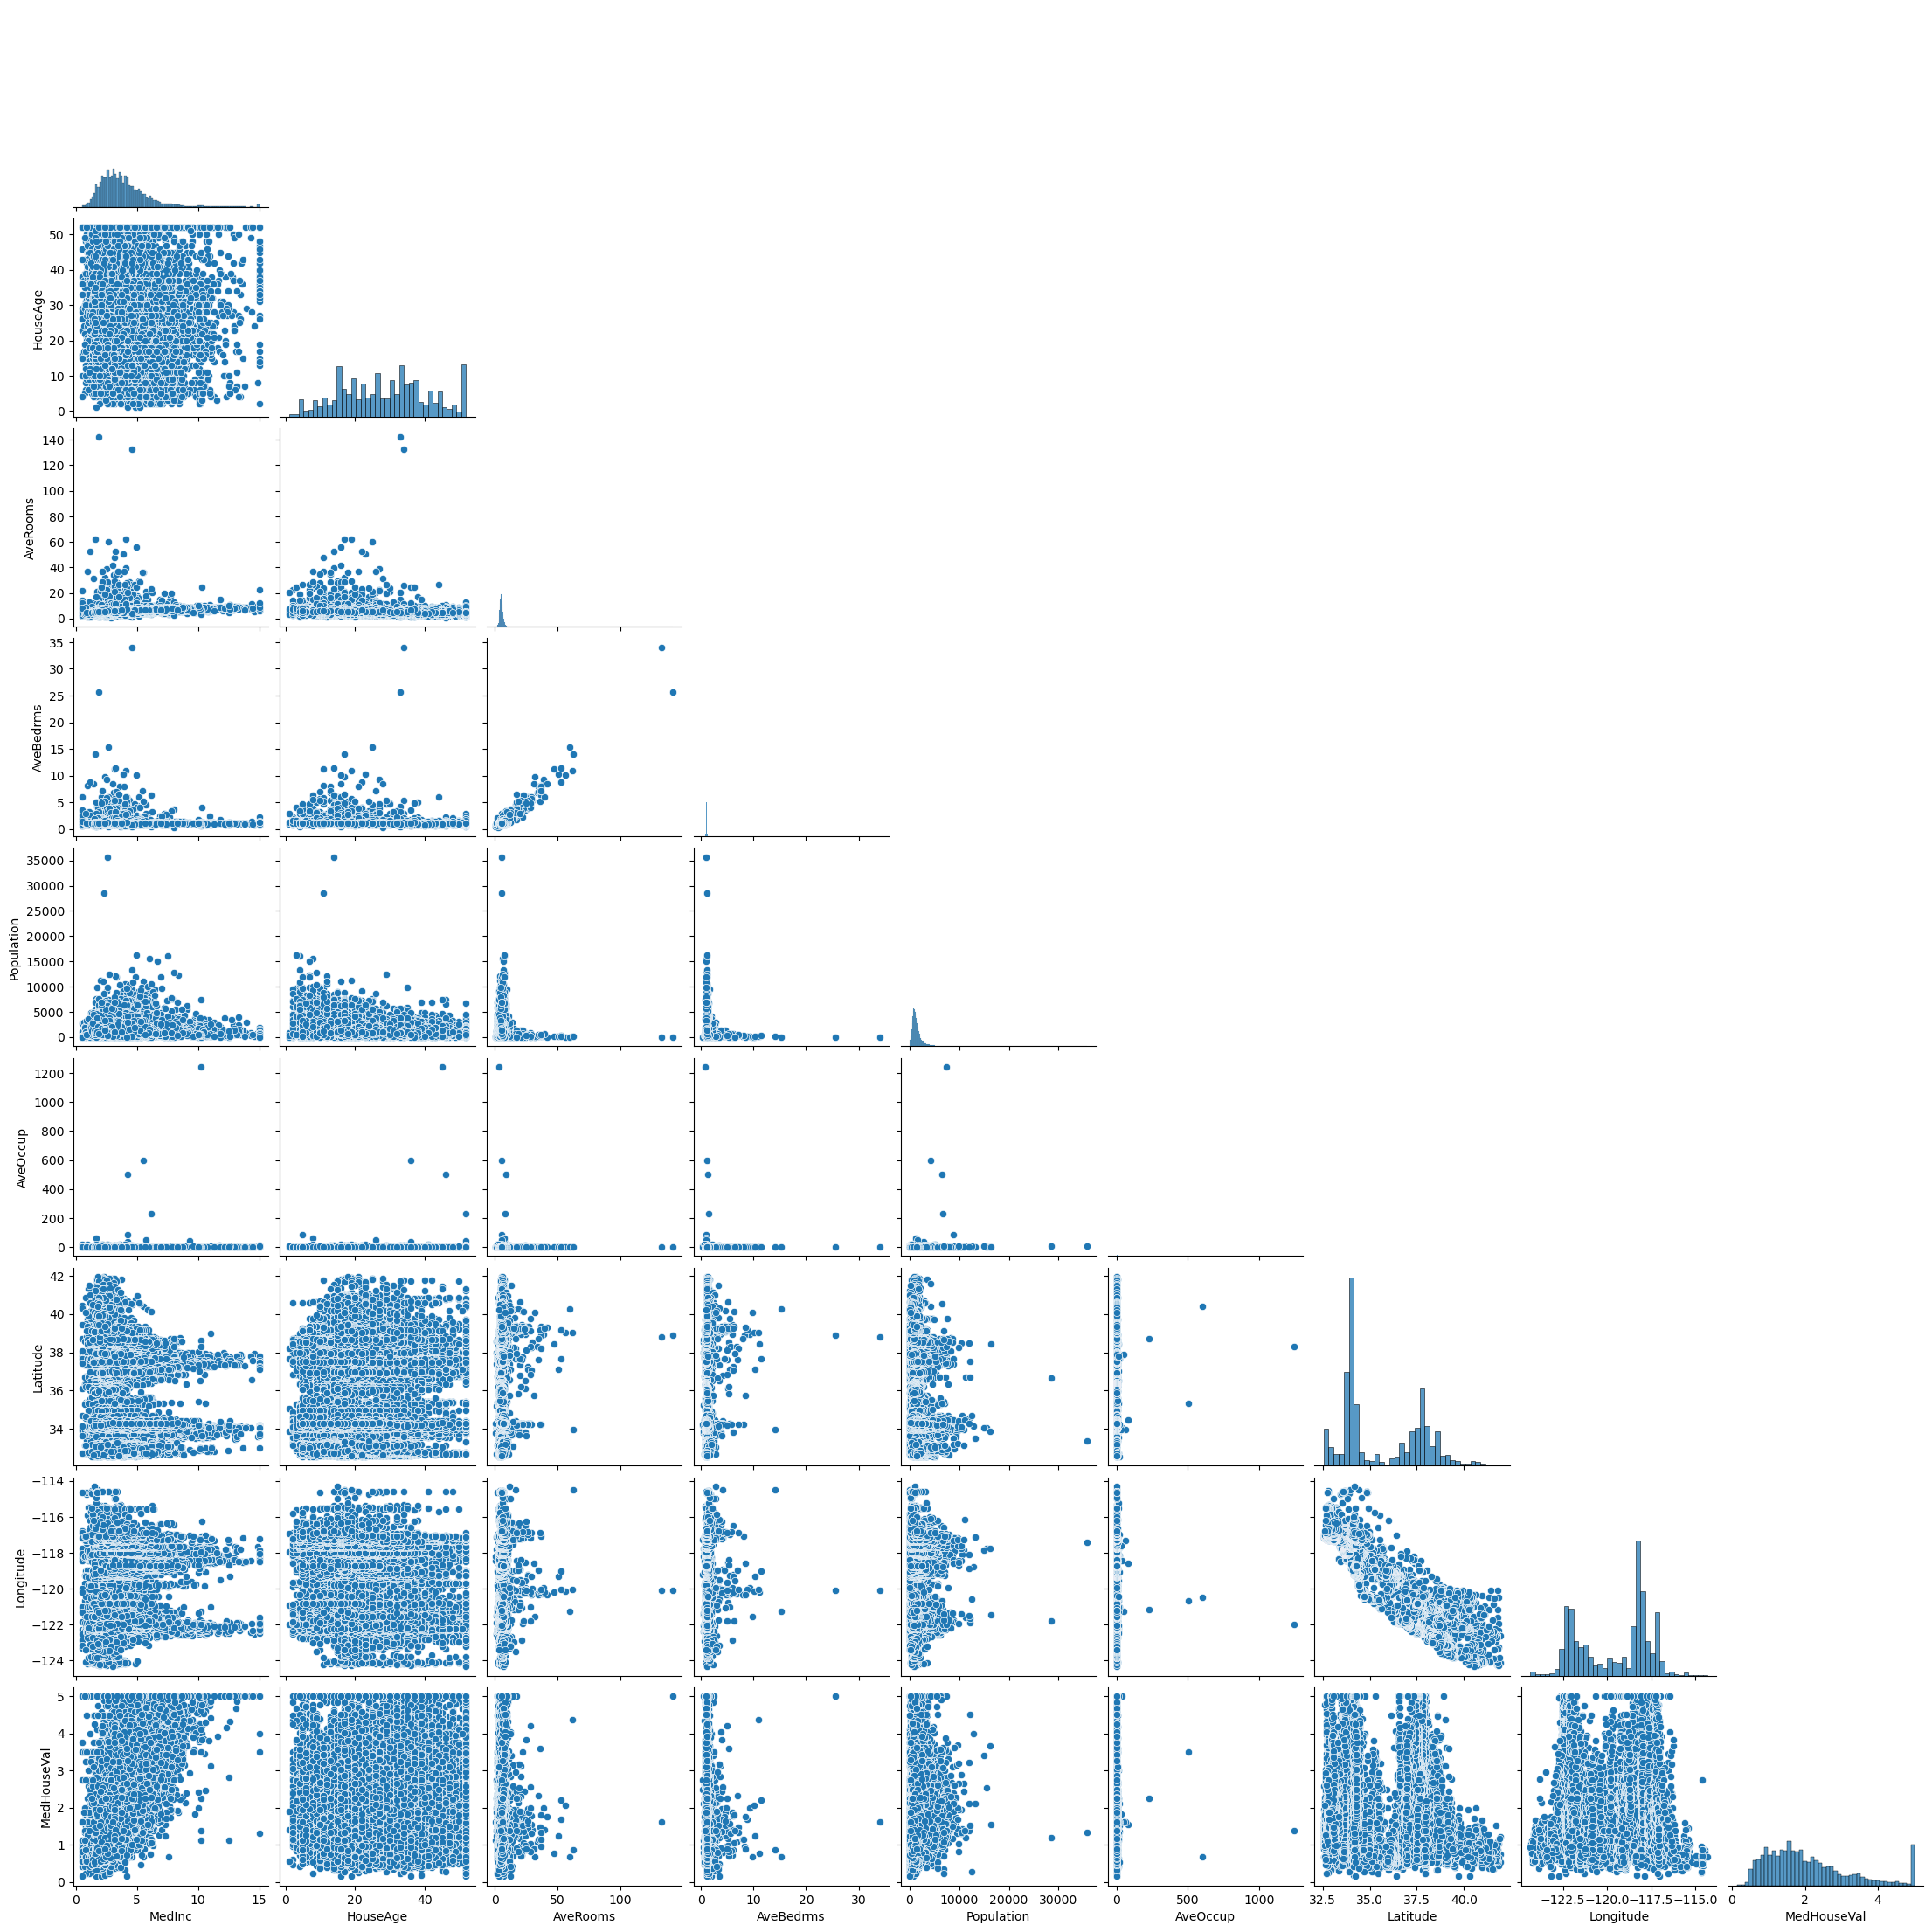

In [13]:
# Checking data Distribution

sns.pairplot(data = df, corner = True)
plt.show()

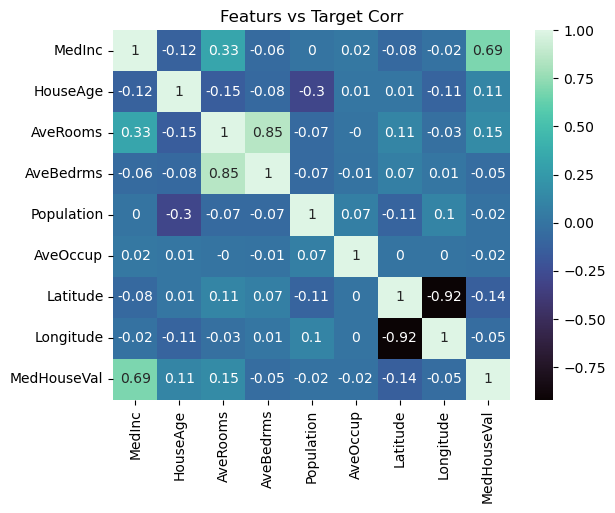

In [14]:
# Checking data Distribution

plt.title("Featurs vs Target Corr")
sns.heatmap(df.corr().round(2),annot = True,cmap = 'mako')
plt.show()

In [15]:
# Data Describe()

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


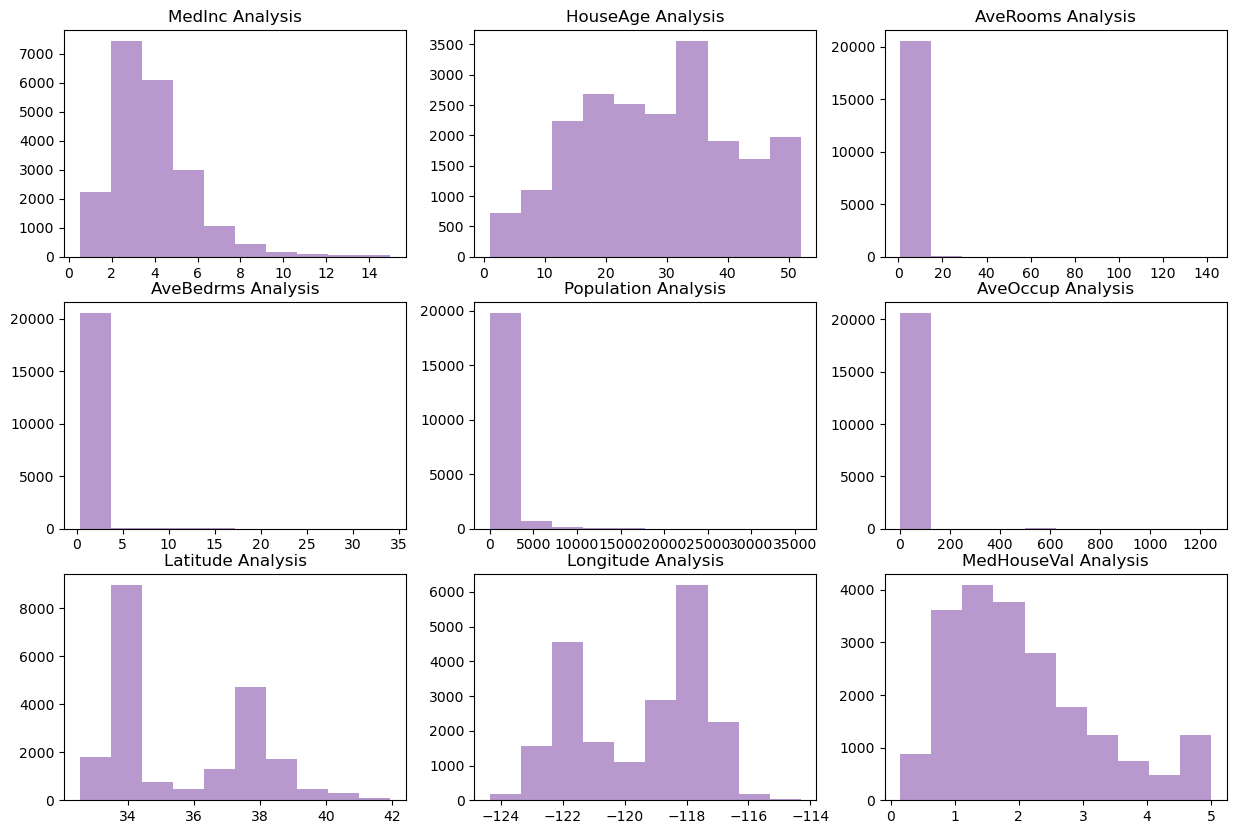

In [16]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j],color='indigo', alpha = 0.4)
    plt.title(j + ' Analysis')
plt.show()

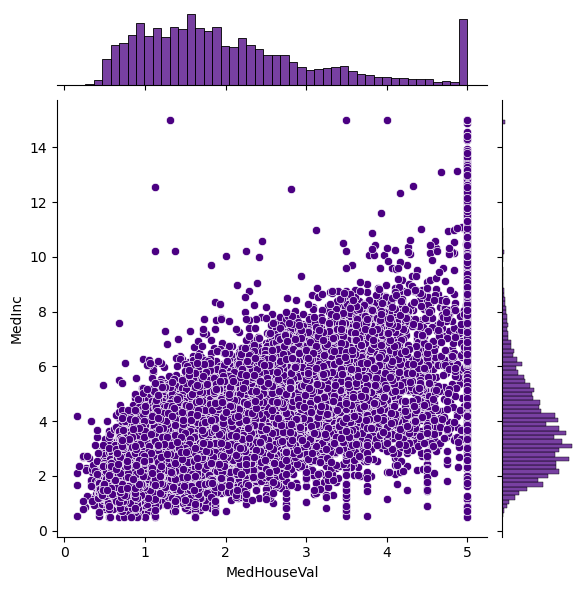

In [17]:
# Distribution of  target Value MedHouseVal vs MedInc


sns.jointplot(data = df, x= 'MedHouseVal', y = 'MedInc', color = 'indigo' )
plt.show()

In [18]:
# sns.regplot(data = df, x= 'MedHouseVal', y = 'MedInc', color = 'indigo' )
# plt.show()

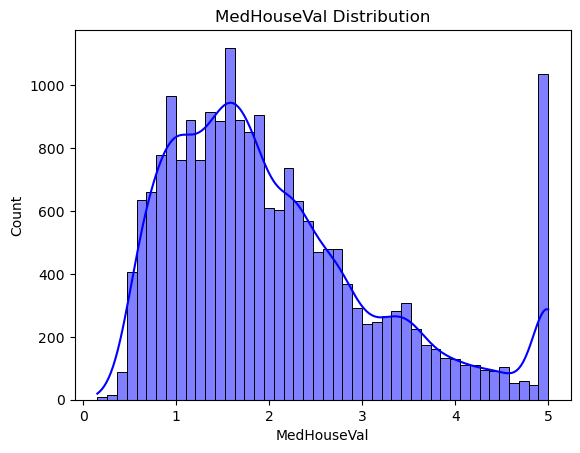

In [19]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [20]:
df['MedHouseVal'].describe()
# 75% of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

## Step 4: Feature Engineering and Preprocessing

In [21]:
# Convert data to same Scale for better prediction 
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')


Done


In [22]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


## Step 5: Train test Split: Split Data for Training and testing Part

In [23]:
# Train test Split: Divide into Part Test Part
# train_test_split: Function: divide

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2, random_state= 150)  # random_state : 42,52,62,72,82,150
print('Done')


Done


In [24]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [25]:
X_scaled.shape

(20640, 8)

## Step 6: Model Building

### Step 6.1: Linear Model Using Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()  # Object Creation

lr_model.fit(X_train,y_train)  # Training Model

LinearRegression()

#### Step 6.1.2: Model prediction

In [27]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [28]:
# 20 % : Actual answer: y_test , Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
                         'Predicted House price':y_pred})

print('Done')

Done


In [29]:
lr_compare_df

,Actual House price,Predicted House price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [30]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('LR MAE',lr_mae)

LR MAE 0.5295622016018945


In [31]:
lr_mse = mean_squared_error(y_test,y_pred)
print('LR MSE',lr_mse)

LR MSE 0.5322170539831859


In [32]:
lr_rmse = lr_mse**.5
print('LR RMSE',lr_rmse)

LR RMSE 0.7295320787896759


In [33]:
# Traning Score
lr_train_score = lr_model.score(X_train,y_train)
print('Traning Score',lr_train_score)

# Testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score',lr_test_score)

Traning Score 0.6081032361747606
Testing Score 0.5984024263886714


In [34]:
# Model Score: apx: 60%, Model not that much good, we need , more parameter tuning
# Alternate Model call
# : feature vs fetaure high corr(X col: 8)


# Variance inflation factor(VIF) > 10 (we can drop that col)
# Bias vs Variance Trade off: Intersect


# Underfit:Traning Score:Low ,Testing Score:Low
# Balancefil:Traning Score:Good ,Testing Score:Good
# Overfit:Traning Score:High ,Testing Score:Low

# Principal Component Analysis (PCA): dimensionality reduction technique
# PCA: Imp Features(cols) Find:(8:5 Imp)

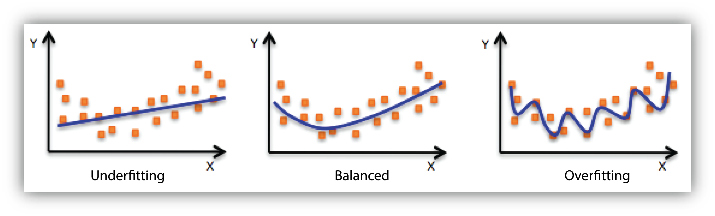

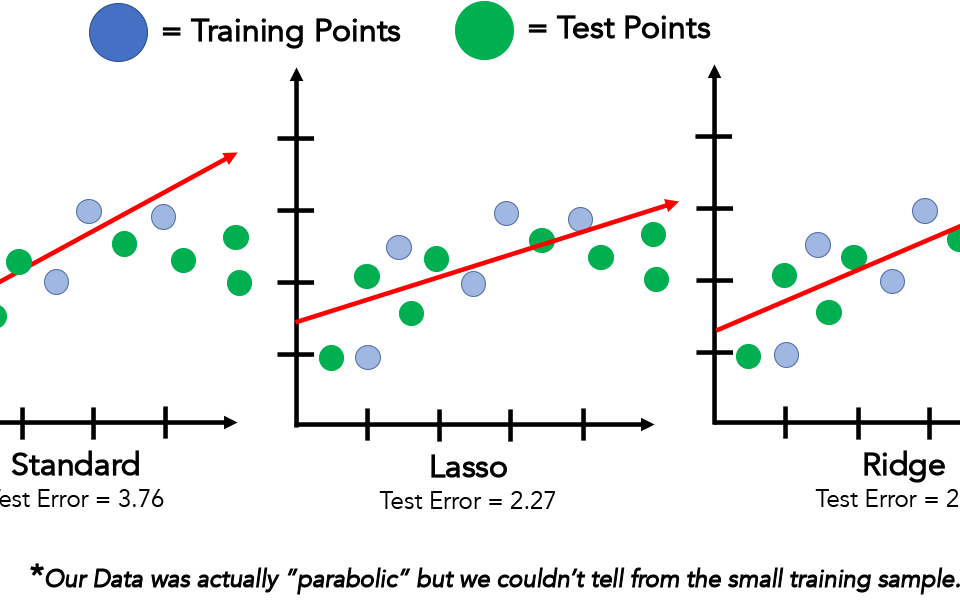

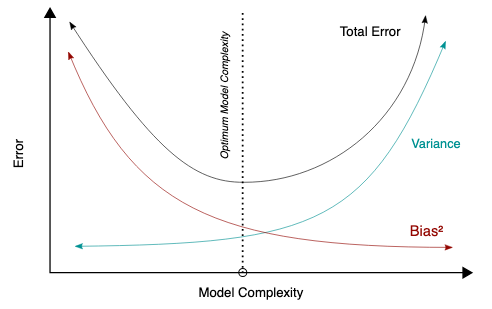

#### Step 6.1.3: Checking VIF and Drop col

In [35]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10914,0.281465,0.333333,0.037008,0.020523,0.083298,0.001898,0.45271,0.26992


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X_train_df['intercept'] = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
11333,0.141633,0.588235,0.022868,0.020067,0.024889,0.001898,0.577046,0.307769,1


In [37]:
#X is an independent features

In [38]:
X_train_df.shape

(16512, 9)

In [39]:
#running loop inside a list = list comprehension
print(['Hello' + str(i)for i in range(10)])

['Hello0', 'Hello1', 'Hello2', 'Hello3', 'Hello4', 'Hello5', 'Hello6', 'Hello7', 'Hello8', 'Hello9']


In [40]:
# X_train_df.shape[1]
# X_train_df.columns
# X_train_df.values


In [41]:
vif_df = pd.DataFrame()
vif_df['Features'] = list(data_dict['feature_names']) + ['intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]
# vif_value

vif_df['VIF Factor'] = vif_value
vif_df.sort_values(by = 'VIF Factor', ascending = False)

#because Latitude nad Longitude have high correlation and VIF close to 10 so we can drop one or both columns

,Features,VIF Factor
8,intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [42]:
col = list(X.columns)
new_col = col.remove('Latitude')
#print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
1024,0.245983,0.666667,0.03022,0.017254,0.029457,0.001332,0.238048


In [43]:
def built_model(ml_model, col):
    new_X_train = pd.DataFrame(X_train, columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test, columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train, y_train)

    model_y_pred = machine_model.predict(final_X_test)
    
    model_train_score = machine_model.score(final_X_train, y_train)
    model_test_score = machine_model.score(final_X_test, y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error= model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score': model_train_score,
                  'Model Test Score': model_test_score,
                  'MAE Error':model_mae_error,
                  'MSE Error': model_mse_error,
                  'RMSE Error': model_rmse_error,
                  'R2 Score': model_r2_score }

    model_matrix = pd.DataFrame(model_metrics, index = [1])
    return model_matrix, machine_model

In [44]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [45]:
col = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

In [46]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.542136,0.529338,0.572508,0.623745,0.789775,0.529338


In [47]:
from sklearn.linear_model import Lasso, Ridge

In [48]:
ml_model = Lasso
#Lasso regression is not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [49]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.525366,0.513044,0.590927,0.645339,0.80333,0.513044


In [50]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
ss_X = sc.fit_transform(X)

i = 1
while True:
    X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state = i, test_size = 0.1)
    i += 1

    temp_df,final_model = built_model(Ridge, col)
    score = temp_df['Model Test Score'].values[0]

    print('Score is:', score)
    if score >= 0.6:
        print('Best random state', i)
        display(temp_df)
        final_model
        break
        
    display(clear = True)

Score is: 0.6067450510265389
Best random state 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [51]:
#Best random state 178
final_model

Ridge()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state = 178, test_size = 0.1)
built_model(LinearRegression, col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.538395,0.551215,0.558446,0.576246,0.759109,0.551215


# Step 7: Model Save and Extra Objects

In [54]:
import pickle 

with open('House_Price_Pred_Ridge_Model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open ('sc_scaler.pkl','wb') as f:
    pickle.dump(sc, f)

print('ML Model and Scaler Saved Successfully!!') 

ML Model and Scaler Saved Successfully!!


# Step 8: Website Building and LocalHost Deployment

In [57]:
#website: python based = Django, Flask, Fastapi, Streamlit
#Streamlit = python web based framework, fast ML model test website
#Streamlit = Development + Deployment (for ML engineers)

In [59]:
#pip install streamlit

In [61]:
import streamlit as st
print('done')

done


In [62]:
# st.title('California Housing Price Prediction')

In [64]:
# Exclaimation Mark (!): represents run this code in terminal

In [70]:
!streamlit run house.py

^C


In [71]:
import os

In [72]:
os.getcwd()

'C:\\Users\\jai mata di'

In [73]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [75]:
df.to_csv('california.csv')
print('Done')

Done


In [76]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min', 'max'])

    print('min', i, min_value)
    print('max', i, max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [78]:
# temp_df = pd.read_csv('california.csv')
# for i in temp_df[col]:
#     min_value, max_value = = df[i].agg(['min', 'max'])

# Step 9: Live Deployment using Streamlit

In [79]:
# #Github = housing price project
# requirements.txt = we will write those modules which are important for app.py to run the project

In [80]:
pd.__version__

'2.2.3'

In [81]:
st.__version__

'1.45.1'